In [46]:
import pandas as pd
import numpy as np
import sys

In [47]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv")
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [49]:
df.all()

tau1     True
tau2     True
tau3     True
tau4     True
p1       True
p2       True
p3       True
p4       True
g1       True
g2       True
g3       True
g4       True
stab     True
stabf    True
dtype: bool

In [50]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [51]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

####As you can see above, there is No NULL values.

Also `Stab` and `Satbf` are related and we want answer as `Stable` or `Unstable`
So we will drop `stab` and `stabf` will work as sole dependent variable that we will use for prediction.

In [52]:
df.drop(columns='stab',inplace=True)

In [53]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


Now we have `12 features` and `1 dependent` variable.
</br>We will convert `categorical values` to `numerical values` of `stabf`.


In [54]:
df['stabf']=df['stabf'].replace({'unstable':0,'stable':1})
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,1
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,1
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0


###TRAIN TEST SPLIT

In [55]:
x=df.drop(columns='stabf')
y=df['stabf']

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [57]:
#To scale the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)

In [58]:
print(scaled_X_train)

[[ 0.36732671 -0.98604156  0.65044706 ...  0.33985949  0.58556788
   0.49223946]
 [-0.06465869  0.08943734  1.03507899 ... -1.5584875   1.42964862
  -1.44352101]
 [-1.46785     1.29841758 -0.50253617 ...  1.45153362 -1.04574277
   0.49248925]
 ...
 [ 0.65760851 -0.72275633 -1.4058879  ...  0.29310048 -1.55058661
   0.81034412]
 [-0.05931596 -1.26053241 -1.01047147 ... -0.38825455 -0.72678059
   1.66791568]
 [-1.47321368  0.63843757  0.25012249 ... -1.17410957  1.179282
   0.78362657]]


In [59]:
print(scaled_X_test)

[[ 0.59216281 -0.42056489  1.47247233 ...  1.17528683 -1.49264423
   1.08629139]
 [ 0.19918339  0.36454311 -0.19007599 ... -0.39594869  1.41270302
   1.2275355 ]
 [-1.08603505 -0.32183365 -0.87350524 ... -1.44437004  0.65421559
  -1.67979856]
 ...
 [ 0.94713772 -1.66831304 -1.62907667 ...  0.12889933  0.57628587
   1.32084757]
 [-1.12735376  0.18457336 -0.23820702 ...  0.80017191 -1.3484627
  -0.79985771]
 [-1.38555998  1.49904306  0.27297057 ... -0.92058109  0.00903865
   1.19055888]]


##MODELS 

`RANDOM CLASSIFIER`

In [70]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(random_state=1)
RFC.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [71]:
y_pred=RFC.predict(X_test)
print(y_pred)

[0 0 1 ... 1 0 0]


`Question 2`

In [100]:
# model accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {}'.format(accuracy))

# classification report
from sklearn.metrics import classification_report

print('Classification Report:\n', classification_report(y_test,y_pred, digits =4))

Accuracy: 0.9295
Classification Report:
               precision    recall  f1-score   support

           0     0.9315    0.9612    0.9461      1288
           1     0.9255    0.8722    0.8980       712

    accuracy                         0.9295      2000
   macro avg     0.9285    0.9167    0.9221      2000
weighted avg     0.9294    0.9295    0.9290      2000



In [91]:
from sklearn.ensemble import ExtraTreesClassifier
EFC=ExtraTreesClassifier(random_state=1, criterion='entropy',n_estimators=5,max_features=2)
EFC.fit(X_train,y_train)

ExtraTreesClassifier(criterion='entropy', max_features=2, n_estimators=5,
                     random_state=1)

In [92]:
y_pred_EFC=EFC.predict(X_test)
print(y_pred_EFC)
print(accuracy_score(y_pred_EFC,y_test))

[0 0 1 ... 1 0 0]
0.819


In [103]:
# model accuracy
etc_accuracy = accuracy_score(y_test, y_pred_EFC)
print('Accuracy: {}'.format(etc_accuracy))

# classification report
print('Classification Report:\n', classification_report(y_test,y_pred_EFC, digits =4))

Accuracy: 0.819
Classification Report:
               precision    recall  f1-score   support

           0     0.8370    0.8929    0.8640      1288
           1     0.7796    0.6854    0.7294       712

    accuracy                         0.8190      2000
   macro avg     0.8083    0.7891    0.7967      2000
weighted avg     0.8165    0.8190    0.8161      2000



In [93]:
importance= EFC.feature_importances_
normalised_feature_importance=np.std([tree.feature_importances_ for tree in 
                                        EFC.estimators_],
                                        axis = 0)

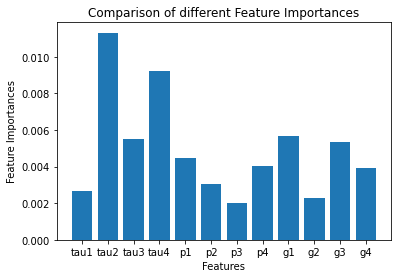

In [94]:
plt.bar(X_train.columns, normalised_feature_importance)
plt.xlabel('Features')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [105]:
from xgboost import XGBClassifier

xbc= XGBClassifier(random_state = 1)

# fit on train set
xbc.fit(scaled_X_train, y_train)

XGBClassifier(random_state=1)

In [106]:
xbc_pred = xbc.predict(scaled_X_test)

In [107]:
# model accuracy
xbc_accuracy = accuracy_score(y_test, xbc_pred)
print('Accuracy: {}'.format(xbc_accuracy))

# classification report
print('Classification Report:\n', classification_report(y_test,xbc_pred, digits =4))

Accuracy: 0.919
Classification Report:
               precision    recall  f1-score   support

           0     0.9164    0.9620    0.9386      1288
           1     0.9244    0.8413    0.8809       712

    accuracy                         0.9190      2000
   macro avg     0.9204    0.9016    0.9098      2000
weighted avg     0.9193    0.9190    0.9181      2000



In [109]:
from lightgbm import LGBMClassifier

lgbm= LGBMClassifier(random_state = 1)

# fit on train set
lgbm.fit(scaled_X_train, y_train)

LGBMClassifier(random_state=1)

In [110]:
lgbm_pred = lgbm.predict(scaled_X_test)

In [111]:
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
print('Accuracy: {}'.format(lgbm_accuracy))

# classification report
print('Classification Report:\n', classification_report(y_test,lgbm_pred, digits =4))


Accuracy: 0.9355
Classification Report:
               precision    recall  f1-score   support

           0     0.9414    0.9596    0.9504      1288
           1     0.9243    0.8919    0.9078       712

    accuracy                         0.9355      2000
   macro avg     0.9328    0.9257    0.9291      2000
weighted avg     0.9353    0.9355    0.9352      2000



In [112]:
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# randomsearch with 5folds

randomcv = RandomizedSearchCV(estimator = etc, 
                              param_distributions = hyperparameter_grid, cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1,
                              random_state = 1)
